# <span style='font-family:"Times New Roman"'> Group 20 Code

## <span style='font-family:"Times New Roman"'> Loading required modules

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
%matplotlib inline
import string
# from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
from contextlib import contextmanager
import time
# from geotext import GeoText
import re
from collections import Counter
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## <span style='font-family:"Times New Roman"'> Exploratory Data Analysis: 

In [15]:
# Read the raw data file and keep all non-zero columns
df = pd.read_csv('shared_data_read_only/Goal4.csv')
df = df.iloc[: , :26]
df.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,TimeCoverage,UpperBound,LowerBound,BasePeriod,Source,GeoInfoUrl,FootNote,Age,Education level,Location,Nature,Quantile,Reporting Type,Sex,Type of skill,Units
0,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2013,11.0,2013,NaN,NaN,NaN,NaN,National Learning Assessment (NLA): Monitoring...,NaN,NaN,NaN,PRIMAR,NaN,C,NaN,G,BOTHSEX,SKILL_MATH,PERCENT
1,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2013,13.0,2013,NaN,NaN,NaN,NaN,National Learning Assessment (NLA): Monitoring...,NaN,NaN,NaN,PRIMAR,NaN,C,NaN,G,BOTHSEX,SKILL_READ,PERCENT
2,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2016,21.5,2016,NaN,NaN,NaN,NaN,National Learning Assessment (NLA): Monitoring...,NaN,NaN,NaN,GRAD23,NaN,C,NaN,G,MALE,SKILL_READ,PERCENT
3,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2016,22.5,2016,NaN,NaN,NaN,NaN,National Learning Assessment (NLA): Monitoring...,NaN,NaN,NaN,GRAD23,NaN,C,NaN,G,FEMALE,SKILL_READ,PERCENT
4,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2016,22.0,2016,NaN,NaN,NaN,NaN,National Learning Assessment (NLA): Monitoring...,NaN,NaN,NaN,GRAD23,NaN,C,NaN,G,BOTHSEX,SKILL_READ,PERCENT


### We simply print out the value counts info for each features in the raw data except the 'Value' column to explore the potential distribution

In [4]:
names = list(df.columns.values)
names.remove('Value')
for name in names:
    
    print(df[name].value_counts())
    print('========================================================================================')

4    191762
Name: Goal, dtype: int64
4.1    80340
4.5    70435
4.c    13535
4.a    10546
4.2     6127
4.4     5929
4.b     2276
4.5     1328
4.3     1009
4.6      237
Name: Target, dtype: int64
4.1.2    76351
4.5.1    71763
4.c.1    13535
4.a.1    10546
4.4.1     5929
4.2.2     5883
4.1.1     3989
4.b.1     2276
4.3.1     1009
4.2.1      244
4.6.1      237
Name: Indicator, dtype: int64
SE_TOT_CPLR       76351
SE_AGP_CPRA       24268
SE_ALP_CPLR       23524
SE_TRA_GRDL       13535
SE_AWP_CPRA       12232
SE_ADT_ACTS        5929
SE_PRE_PARTN       5883
SE_GPI_TCAQ        4046
SE_TOT_PRFL        3989
DC_TOF_SCHIPSL     2276
SE_ACS_ELECT       2163
SE_ACS_H2O         1742
SE_ACC_HNDWSH      1668
SE_GPI_PTNPRE      1663
SE_ACS_SANIT       1611
SE_ACS_CMPTR       1557
SE_ACS_INTNT       1470
SE_TOT_GPI         1370
SE_TOT_SESPI       1193
SE_LGP_ACHI        1035
SE_ADT_EDUCTRN     1009
SE_TOT_RUPI         930
SE_NAP_ACHI         864
SE_INF_DSBL         335
SE_GPI_PART         321
SE_GPI_ICTS

#### From the previous output, we realize that 'TimeCoverage', 'UpperBond', 'LowerBond', and 'GeoInfoUrl' are empty columns.
#### And the 'Goal', 'Reporting Type', and 'BasePeriod' are all identical values for all instances
#### Futhermore, we discard 'Time_Detail' because it is redundant from 'TimePeriod'. We discard 'Target' because it can be covered by 'Indicator'. 'GeoAreaCode' and 'GeoAreaName' have identical distribution which is aligned perfectly, so we keep 'GeoAreaCode' only.

In [16]:
df = df.drop(columns=['Goal','Target','SeriesDescription','Time_Detail','TimeCoverage', 'UpperBound', 'LowerBound', 'BasePeriod','GeoInfoUrl','Reporting Type','FootNote','Source','Age'])

In [17]:
print(df.shape)
df.head()

(191762, 13)


,Indicator,SeriesCode,GeoAreaCode,GeoAreaName,TimePeriod,Value,Education level,Location,Nature,Quantile,Sex,Type of skill,Units
0,4.1.1,SE_TOT_PRFL,4,Afghanistan,2013,11.0,PRIMAR,NaN,C,NaN,BOTHSEX,SKILL_MATH,PERCENT
1,4.1.1,SE_TOT_PRFL,4,Afghanistan,2013,13.0,PRIMAR,NaN,C,NaN,BOTHSEX,SKILL_READ,PERCENT
2,4.1.1,SE_TOT_PRFL,4,Afghanistan,2016,21.5,GRAD23,NaN,C,NaN,MALE,SKILL_READ,PERCENT
3,4.1.1,SE_TOT_PRFL,4,Afghanistan,2016,22.5,GRAD23,NaN,C,NaN,FEMALE,SKILL_READ,PERCENT
4,4.1.1,SE_TOT_PRFL,4,Afghanistan,2016,22.0,GRAD23,NaN,C,NaN,BOTHSEX,SKILL_READ,PERCENT


In [19]:
#Filter the country names with the country list
countries = ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize', 'Benin', 'Bhutan','Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo','Congo, Democratic Republic', 'Costa Rica', 'Croatia', "Côte d'Ivoire", 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia (Federated States of)','Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan', 'Sri Lanka', 'Sudan', 'Suriname', 'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine', 'United Republic of Tanzania', 'Uruguay', 'Uzbekistan', 'Vanuatu','Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']
df = df.loc[df['GeoAreaName'].isin(countries)]
df = df.drop(columns=['GeoAreaName'])
print(df.shape)

(151145, 12)


### There is one interesting finding with country code 434: Libya. All values are close to 0

<AxesSubplot:xlabel='GeoAreaCode', ylabel='avg_value'>

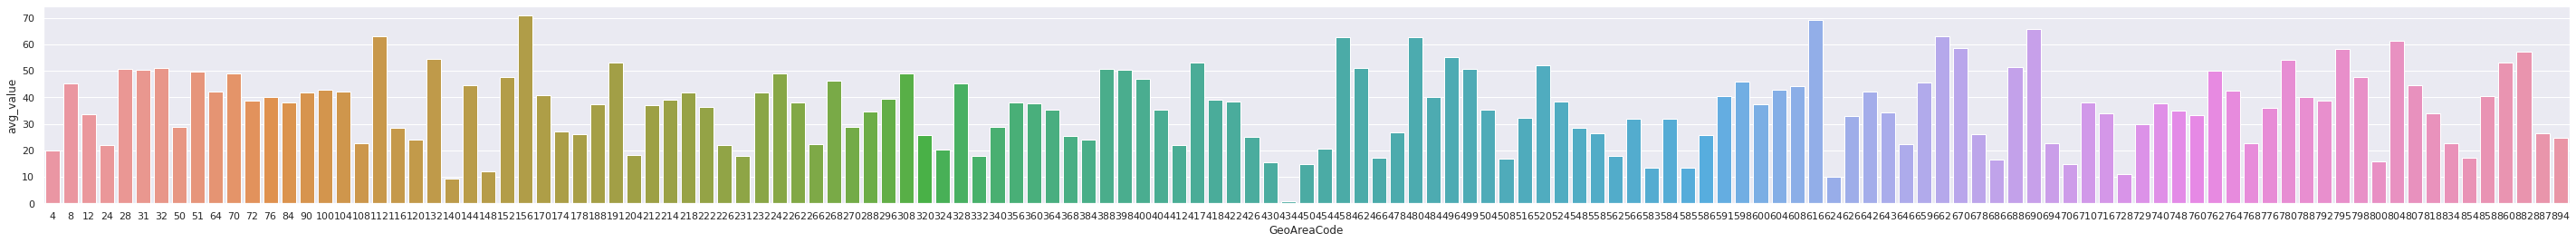

In [21]:
f, ax = plt.subplots(1, 1, figsize=(50, 4))
set1 = df.groupby('GeoAreaCode').mean()['Value'].reset_index(name='avg_value')
sns.barplot(x='GeoAreaCode',y='avg_value',data=set1, ax=ax)

### We figure out SeriesCode and Indicator have huge influence to Value

<AxesSubplot:xlabel='SeriesCode', ylabel='avg_value'>

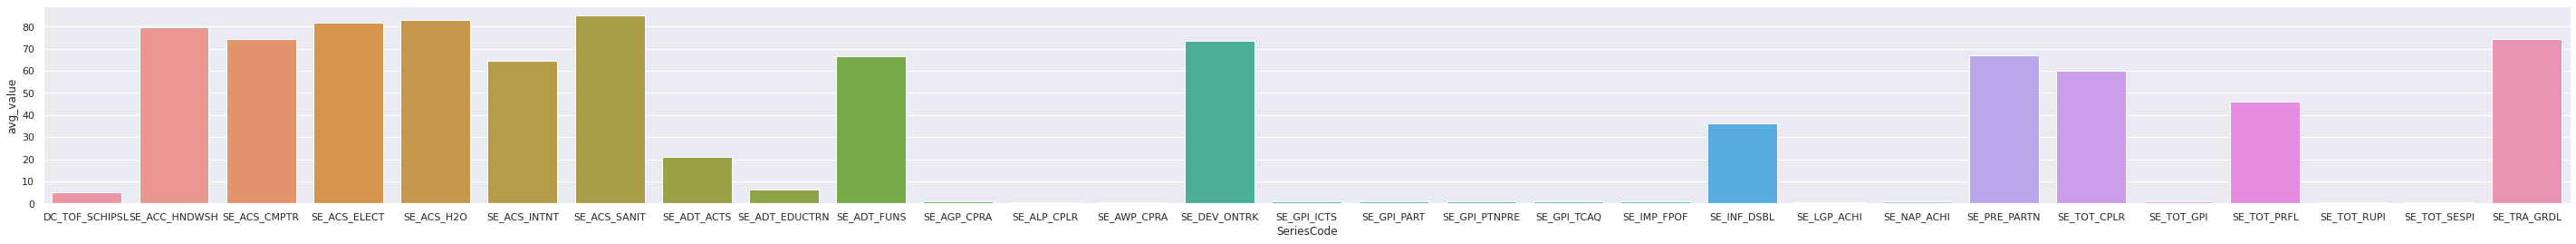

In [23]:
f, ax = plt.subplots(1, 1, figsize=(50, 4))
set1 = df.groupby('SeriesCode').mean()['Value'].reset_index(name='avg_value')
sns.barplot(x='SeriesCode',y='avg_value',data=set1, ax=ax)

<AxesSubplot:xlabel='Indicator', ylabel='avg_value'>

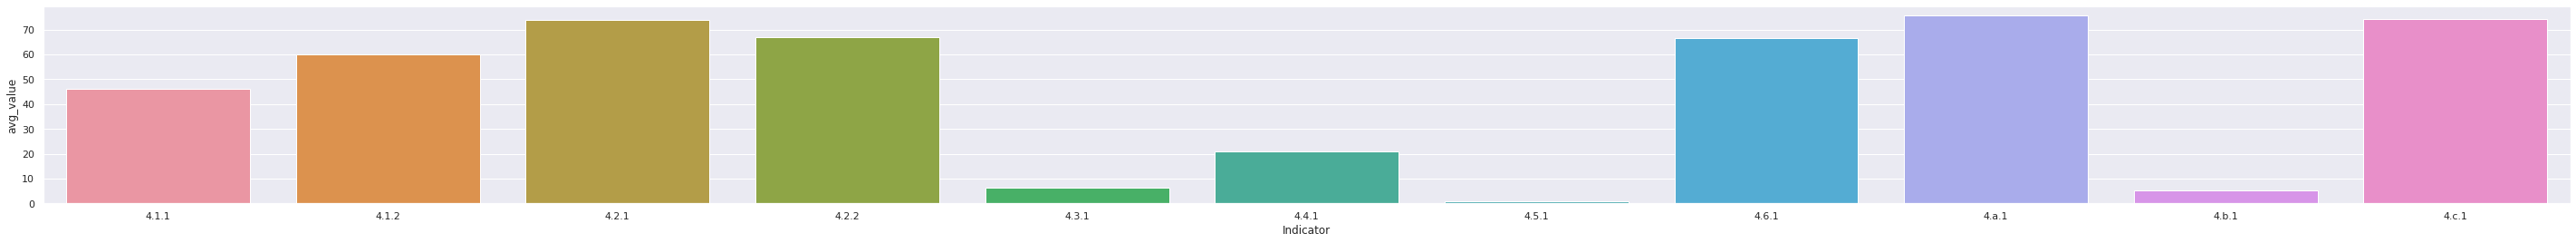

In [24]:
f, ax = plt.subplots(1, 1, figsize=(50, 4))
set1 = df.groupby('Indicator').mean()['Value'].reset_index(name='avg_value')
sns.barplot(x='Indicator',y='avg_value',data=set1, ax=ax)

## <span style='font-family:"Times New Roman"'> Reading CSV File: 

In [3]:
df = pd.read_csv ('shared_documents//Cleaned_v2.csv')

## <span style='font-family:"Times New Roman"'> Preprocessing the dataset: 

In [4]:
# Deleting index column 
del df['Unnamed: 0']
# Replacing 'Nan' values in dataset with 'NS', Not Specified 
df['Location'].fillna('NS', inplace=True)
df["Type of skill"].fillna('NS', inplace=True)
df["Education level"].fillna('NS', inplace=True)
df["Sex"].fillna('NS', inplace=True)
# Removing rows with 'Nan' values from the dataset
# They are not valid datapoints 
df = df[df['Value'].notna()]

## <span style='font-family:"Times New Roman"'> Splitting train and test dataset:

### <span style='font-family:"Times New Roman"'> Data from year 2000 to 2018 are selected for train dataset and data from 2019 are training dataset. 

In [5]:
# Converting categorical variable into dummy/indicator variables. 
FG = pd.get_dummies(df)
# Selecting train dataset from 2000-2018
train = FG.loc[FG['TimePeriod'] != 2019]
# Selecting test dataset (year 2019)
test = FG.loc[FG['TimePeriod'] == 2019]
# Seperating target values from features 
x_test = test.loc[:, test.columns != 'Value']
y_test = test['Value']
x_train = train.loc[:, train.columns != 'Value']
y_train = train['Value']

## <span style='font-family:"Times New Roman"'> Gradient Boosing Regressor: 

### <span style='font-family:"Times New Roman"'> GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

### <span style='font-family:"Times New Roman"'>For loss function 'lad' (least absolute deviation) which is a highly robust loss function solely based on order information of the input variables was used.
### <span style='font-family:"Times New Roman"'> Number of estimators is set to 500 with max depth of the tree as 5.
### <span style='font-family:"Times New Roman"'> Leaning reate value was set to 0.1. 

In [6]:
reg = GradientBoostingRegressor(loss = "lad", n_estimators = 500, max_depth = 5)

## <span style='font-family:"Times New Roman"'> Fitting: 

In [7]:
reg.fit(x_train, y_train)

GradientBoostingRegressor(loss='lad', max_depth=5, n_estimators=500)

## <span style='font-family:"Times New Roman"'> Predicting: 

In [11]:
reg.predict(x_test)

array([ 3.68957115e+01,  3.46368280e+01,  3.60119869e+01,  8.18160065e+01,
        7.92337554e+01,  7.59822908e+01,  7.04578001e+01,  6.46282654e+01,
        6.78755489e+01,  8.88306435e+01,  8.36916770e+01,  8.68120295e+01,
        6.61998552e+01,  6.20453489e+01,  6.51657014e+01,  5.21315544e+01,
        5.39705974e+01,  5.08502448e+01,  7.13952684e+01,  6.96420291e+01,
        7.12334645e+01,  8.07988267e+01,  7.89366690e+01,  8.12364642e+01,
        7.33657104e+01,  7.15035527e+01,  7.38126942e+01,  5.17960911e+01,
        4.97664543e+01,  5.22392139e+01,  6.17440157e+01,  5.86988854e+01,
        6.21871385e+01,  4.92105772e+01,  4.58236120e+01,  4.96536999e+01,
        8.29756825e+01,  7.99305522e+01,  8.34188052e+01,  6.93771726e+01,
        6.89340498e+01,  6.68725613e+01,  7.55870434e+01,  7.36146857e+01,
        7.60301662e+01,  7.41195572e+01,  7.23656454e+01,  7.45626799e+01,
        7.84311575e+01,  7.71616641e+01,  7.96391219e+01,  7.83367479e+01,
        8.06985624e+01,  

In [12]:
print('The R-squared value is: ')
print(reg.score(x_test,y_test))

The R-squared value is: 
0.7993266625700717


In [13]:
print('The MSE is: ')
print(mean_squared_error(y_test, reg.predict(x_test)))

The MSE is: 
135.82061740363446


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
r2 = r2_score(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)

print(f"R-Sq: {r2:.4}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
x_train = x_train.values.reshape((x_train.shape[0],1,  x_train.shape[1]))
x_test = x_test.values.reshape((x_test.shape[0],1, x_test.shape[1]))
model = Sequential()
model.add(LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
model.fit(x_train, y_train, epochs=50, batch_size=72, validation_data=(x_test, y_test), verbose=2, shuffle=False)